In [5]:
# Python works inline, quick syntax recap
##
print(5)

##
a = [1,2,3]
[x + 1 for x in a]
print(a)

##
b = f"{2+3} number"
print(b)

##
c = { 'x': 2, 'y': '5' }

5
[1, 2, 3]
5 number


[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
[0.0, 0.010000000000000002, 0.04000000000000001, 0.09000000000000002, 0.16000000000000003, 0.25, 0.3600000000000001, 0.4900000000000001, 0.6400000000000001, 0.81]


<AxesSubplot:>

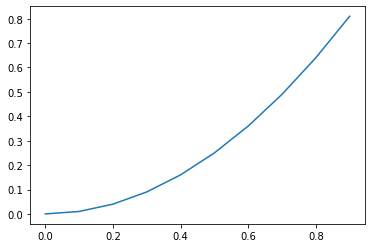

In [6]:
# Example of plotting with seaborn
import numpy as np
import seaborn as sns

x = np.arange(0.0, 1.0, step=0.1)
print(x)
y = [pow(x, 2) for x in x]
print(y)

sns.lineplot(x=x, y=y)

In [7]:
# Create data frame
import pandas as pd

data_dict = { 'A': x, 'B': y }
df = pd.DataFrame(data_dict)

df

,A,B
0,0.0,0.00
1,0.1,0.01
2,0.2,0.04
3,0.3,0.09
4,0.4,0.16
5,0.5,0.25
6,0.6,0.36
7,0.7,0.49
8,0.8,0.64
9,0.9,0.81


In [8]:
# Playing with the data frames

df['A']
df[['A']]
df[['A', 'B']]

df[df['A'] == 0.0]

## rows first, then columns
df.loc[:, 'A']
df.iloc[:, 0]

0    0.0
1    0.1
2    0.2
3    0.3
4    0.4
5    0.5
6    0.6
7    0.7
8    0.8
9    0.9
Name: A, dtype: float64

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
[0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5]


/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

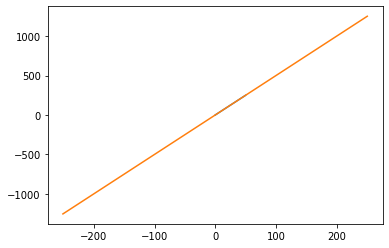

In [11]:
# Simple linear model
linear_function = lambda x: x * 5

x = np.arange(0.0, 50.0, step=0.1)
y = np.array([linear_function(x) for x in x])

print(x[:10])
print(y[:10])

# machine learning models works with an 2d array structure to hold data columns, and rows.
# each entry in an array is a row, holding information for all columns
# thats why for one property data, we need it too look like this:
# [
#   [0.0]
#   [0.1]
#   [0.2]
# ]
X = x.reshape(-1, 1)

sns.lineplot(x, y)

from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(X, y)

lx_test = np.arange(-251.0, 251.0, step=0.5)
ly_test = linear_model.predict(lx_test.reshape(-1, 1))

sns.lineplot(lx_test, ly_test)

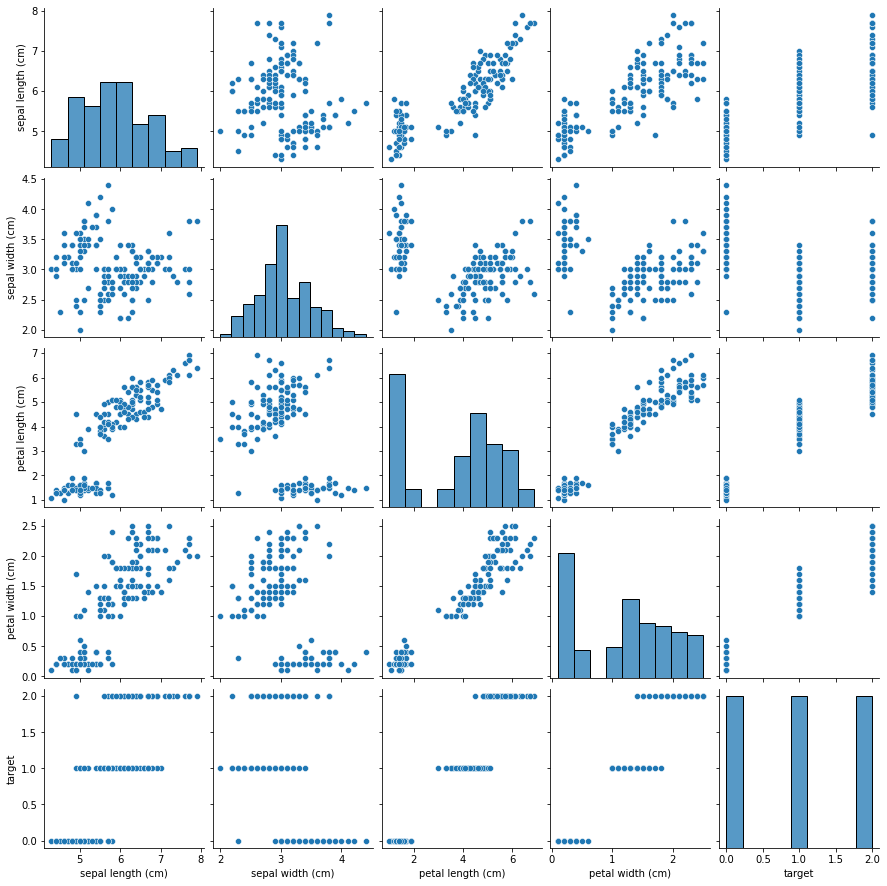

In [13]:
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_iris

# https://scikit-learn.org/stable/datasets/toy_dataset.html#iris-dataset
iris_data = load_iris()
iris_df = pd.DataFrame(data=iris_data.data, columns=iris_data.feature_names)
iris_df['target'] = iris_data.target

sns.pairplot(iris_df)

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

iris_X = iris_df.drop(columns=['target'])
iris_y = iris_df['target']

iris_learn_X, iris_test_X, iris_learn_y, iris_test_y = train_test_split(iris_X, iris_y, test_size=0.6, stratify=iris_y)

# Linear
iris_linear_cls = LogisticRegression()
iris_linear_cls.fit(iris_learn_X, iris_learn_y)

train_score = iris_linear_cls.score(iris_learn_X, iris_learn_y)
test_score = iris_linear_cls.score(iris_test_X, iris_test_y)

print("Linear")
print(f"Train score {train_score}")
print(f"Test score {test_score}")

# Forest
iris_forest_cls = RandomForestClassifier()
iris_forest_cls.fit(iris_learn_X, iris_learn_y)

train_score = iris_forest_cls.score(iris_learn_X, iris_learn_y)
test_score = iris_forest_cls.score(iris_test_X, iris_test_y)

print("Random Forest")
print(f"Train score {train_score}")
print(f"Test score {test_score}")

Linear
Train score 0.9666666666666667
Test score 0.9333333333333333
Random Forest
Train score 1.0
Test score 0.9333333333333333


In [46]:
iris_df.head(1)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0


In [18]:
from sklearn.model_selection import RandomizedSearchCV

random_forest_params_grid = {
    'n_estimators': [10, 50, 100, 500],
    'max_depth': [3, 8, 12, None],
}

iris_forest_cls = RandomForestClassifier()

search_cv = RandomizedSearchCV(iris_forest_cls, random_forest_params_grid, n_iter=10)
search_cv.fit(iris_learn_X, iris_learn_y)

print(search_cv.best_params_)

best_forest_estimator = search_cv.best_estimator_
print(best_forest_estimator.score(iris_test_X, iris_test_y))

print(best_forest_estimator.predict([[7.2, 3.3, 0.8, 0.7]]))

{'n_estimators': 100, 'max_depth': 3}
0.9333333333333333
[0]


/usr/local/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
# Other topics:
# - Overfitting / underfitting
# - Cross validation

(117927, 10)

mark               object
model              object
generation_name    object
year                int64
mileage             int64
vol_engine          int64
fuel               object
city               object
province           object
price               int64
dtype: object

audi          12031
opel          11914
bmw           11070
volkswagen    10848
ford           9664
Name: mark, dtype: int64

count    117927.00
mean      70299.88
std       84824.58
min         500.00
25%       21000.00
50%       41900.00
75%       83600.00
max     2399900.00
Name: price, dtype: float64



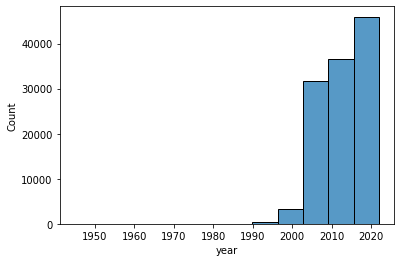

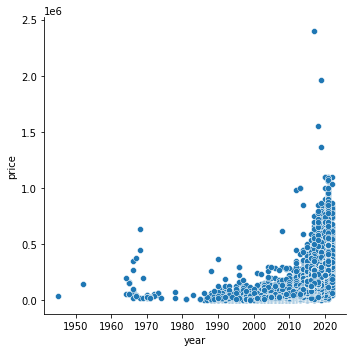

In [19]:
# Load the data
cars_df = pd.read_csv('./data/car_prices_poland.csv', index_col=0)

pd.options.display.float_format = '{:.2f}'.format

print(cars_df.shape)
print()
print(cars_df.dtypes)
print()
print(cars_df['mark'].value_counts().head(5))
print()
print(cars_df['price'].describe())
print()

sns.histplot(data=cars_df, x="year", bins=12)
sns.relplot(data=cars_df, x="year", y="price")

In [85]:
# Deep learning using keras

###
cars_ml_df = cars_df[['mark', 'fuel', 'year', 'mileage', 'vol_engine', 'price']]

In [63]:
print(cars_df['mark'].value_counts())

cars_ml_df = cars_ml_df[cars_ml_df['mark'].isin(['audi', 'opel', 'bmw', 'volkswagen', 'ford'])]

audi             12031
opel             11914
bmw              11070
volkswagen       10848
ford              9664
mercedes-benz     7136
renault           6976
skoda             5888
toyota            5120
peugeot           5056
volvo             4384
hyundai           4032
kia               3744
nissan            3072
fiat              2880
mazda             2848
seat              2848
citroen           2720
honda             2176
mitsubishi        1120
mini              1088
alfa-romeo         704
chevrolet          608
Name: mark, dtype: int64


In [64]:
print(cars_ml_df['fuel'].value_counts())

Diesel      26421
Gasoline    26305
LPG          1785
Hybrid        547
Electric      440
CNG            29
Name: fuel, dtype: int64


In [29]:
print(cars_ml_df['year'].value_counts())

cars_ml_df = cars_ml_df[cars_ml_df['year'] >= 2000]

2021    4909
2018    3846
2017    3789
2009    3253
2008    3237
2011    3086
2007    2945
2016    2903
2012    2895
2010    2881
2015    2682
2006    2650
2014    2548
2013    2508
2019    2026
2005    2020
2004    1456
2020    1352
2022    1040
2003     958
2002     753
2001     493
2000     386
1999     311
1998     222
1997     122
1996      80
1995      37
1994      31
1993      17
1991      17
1990      13
1992      12
1989       8
1988       7
1966       7
1965       5
1985       3
1968       3
1967       3
1964       2
1987       2
1973       2
1981       1
1952       1
1972       1
1986       1
1969       1
1970       1
1983       1
Name: year, dtype: int64


In [65]:
print(cars_ml_df['year'].value_counts())

cars_ml_df = cars_ml_df[cars_ml_df['year'] >= 2000]

2021    4909
2018    3846
2017    3789
2009    3253
2008    3237
2011    3086
2007    2945
2016    2903
2012    2895
2010    2881
2015    2682
2006    2650
2014    2548
2013    2508
2019    2026
2005    2020
2004    1456
2020    1352
2022    1040
2003     958
2002     753
2001     493
2000     386
1999     311
1998     222
1997     122
1996      80
1995      37
1994      31
1993      17
1991      17
1990      13
1992      12
1989       8
1988       7
1966       7
1965       5
1985       3
1968       3
1967       3
1964       2
1987       2
1973       2
1981       1
1952       1
1972       1
1986       1
1969       1
1970       1
1983       1
Name: year, dtype: int64


In [66]:
cars_ml_df['mileage'].describe()

count     54616.00
mean     151422.80
std       95371.71
min           0.00
25%       79000.00
50%      160000.00
75%      216423.50
max     2800000.00
Name: mileage, dtype: float64

<AxesSubplot:xlabel='mileage', ylabel='Density'>

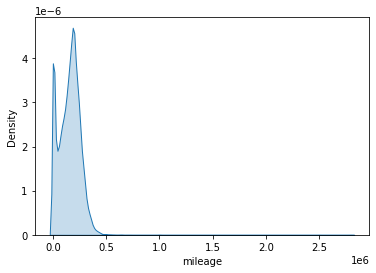

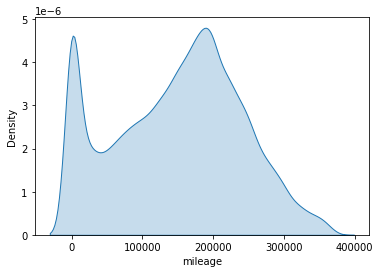

In [67]:
import matplotlib.pyplot as plt

sns.kdeplot(cars_ml_df['mileage'], shade=True)

plt.figure()

mileage_q98 = cars_ml_df['mileage'].quantile(0.99)
sns.kdeplot(cars_ml_df[cars_ml_df['mileage'] < mileage_q98]['mileage'], shade=True)

count   54616.00
mean     1909.22
std       652.89
min         0.00
25%      1560.00
50%      1968.00
75%      1996.00
max      6600.00
Name: vol_engine, dtype: float64


<AxesSubplot:xlabel='vol_engine', ylabel='Density'>

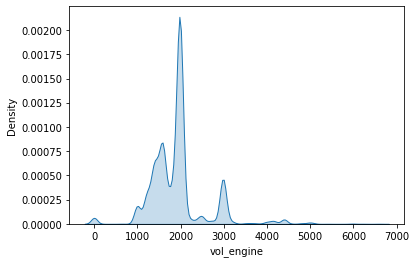

In [46]:
print(cars_ml_df['vol_engine'].describe())

sns.kdeplot(cars_ml_df['vol_engine'], shade=True)

count    117927.00
mean      70299.88
std       84824.58
min         500.00
25%       21000.00
50%       41900.00
75%       83600.00
max     2399900.00
Name: price, dtype: float64


<AxesSubplot:xlabel='price', ylabel='Density'>

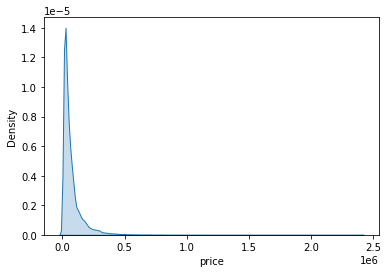

In [51]:
print(cars_ml_df['price'].describe())

sns.kdeplot(cars_ml_df['price'], shade=True)

In [69]:
cars_ml_df.sample(frac=1.0).head(20)

,mark,fuel,year,mileage,vol_engine,price
44203,volkswagen,Gasoline,2020,45000,1498,109000
33876,bmw,Gasoline,2018,14531,1997,142680
7903,opel,Diesel,2005,227032,1910,9000
53874,ford,Diesel,2015,112000,1997,57000
47997,ford,Gasoline,2021,5,999,84600
30197,bmw,Diesel,2015,117000,1995,99700
27707,bmw,Gasoline,2013,113000,1997,74900
30454,bmw,Diesel,2012,250000,1995,60000
21829,audi,Gasoline,2018,78260,1395,104000
27245,bmw,LPG,2006,280000,2497,25500


In [86]:
mark_categories_map = pd.Categorical(cars_ml_df['mark'])
fuel_categories_map = pd.Categorical(cars_ml_df['fuel'])

cars_ml_df['mark'] = mark_categories_map.codes
cars_ml_df['fuel'] = fuel_categories_map.codes

print(mark_categories_map.categories)

cars_ml_df.sample(frac=1.0).head()

Index(['alfa-romeo', 'audi', 'bmw', 'chevrolet', 'citroen', 'fiat', 'ford',
       'honda', 'hyundai', 'kia', 'mazda', 'mercedes-benz', 'mini',
       'mitsubishi', 'nissan', 'opel', 'peugeot', 'renault', 'seat', 'skoda',
       'toyota', 'volkswagen', 'volvo'],
      dtype='object')


/tmp/ipykernel_21/2853628586.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars_ml_df['mark'] = mark_categories_map.codes
/tmp/ipykernel_21/2853628586.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars_ml_df['fuel'] = fuel_categories_map.codes


,mark,fuel,year,mileage,vol_engine,price
21072,1,1,2017,129000,2967,199500
93157,8,3,2019,18821,1591,95550
105109,14,1,2018,25115,1461,96900
7160,15,1,2009,172845,1956,25500
62473,11,1,2011,100000,2143,46500
7961,15,3,2008,187600,1598,16600
36597,21,1,2004,142616,1896,18900
61332,11,1,2020,54634,1950,230000
32854,2,1,2021,0,0,189900
62667,17,3,2021,10,1598,124900


In [ ]:
# Instantiate a sequential model
model = Sequential()
  
# Add 3 dense layers of 128, 64 and 32 neurons each
model.add(Dense(32, input_shape=(1,), activation='relu'))

# Add two Dense layers with 50 neurons and relu activation
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))

# End your model with a Dense layer and no activation
model.add(Dense(1))
  

# Compile your model using categorical_crossentropy loss
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])